In [1]:
!pip install -e ..

Obtaining file:///export/home/fornax/jhoskins/Development/astrohack
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for astrohack (pyproject.toml) ... done
  Created wheel for astrohack: filename=astrohack-0.1.0-0.editable-py3-none-any.whl size=14971 sha256=a3cfbfbc5d8186a0a3ec9a4d7a9ea59dca0b0d35b2fdfa95be27889551e76179
  Stored in directory: /tmp/pip-ephem-wheel-cache-ukmuk3br/wheels/92/c4/f7/67427f82ce804bcc66fc63663cafee2be9a98c9f78ddf37022
Successfully built astrohack
  Attempting uninstall: astrohack
    Found existing installation: astrohack 0.1.0
    Uninstalling astrohack-0.1.0:
      Successfully uninstalled astrohack-0.1.0


In [2]:
import os
import gdown
import shutil

from astrohack.gdown_utils import gdown_data
from astrohack.gdown_utils import build_folder_structure

In [3]:
# Build folder structure & download 

base_name = 'ea25_cal_small_'

datafolder = 'data'
resultsfolder = 'results'

build_folder_structure(datafolder, resultsfolder)

gdown_data(ms_name='ea25_cal_small_before_fixed.split.ms', download_folder=datafolder)
gdown_data(ms_name='ea25_cal_small_after_fixed.split.ms', download_folder=datafolder)

In [4]:
from astrohack.astrohack_client import astrohack_local_client

log_parms = {'log_level':'DEBUG'}

client = astrohack_local_client(cores=2, memory_limit='8GB', log_parms=log_parms)

2023-05-09 13:01:55,201 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_to_term to True
2023-05-09 13:01:55,202 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_to_file to False
2023-05-09 13:01:55,202 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_file to hack_
2023-05-09 13:01:55,202 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_to_term to False
2023-05-09 13:01:55,202 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_to_file to False
2023-05-09 13:01:55,203 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_file to hack_
2023-05-09 13:01:55,203 - INFO     - astrohack - (_check_parms.py:119) - Setting default log_level to INFO
2023-05-09 13:01:57,066 - INFO     - astrohack - (astrohack_client.py:118) - Created client <Client: 'tcp://127.0.0.1:44325' processes=2 threads=2, memory=14.90 GiB>


In [5]:
def test_holog_obs_dictionary(holog_obs_dict):
    import os
    import json
    import copy
    
    import numpy as np

    from astrohack._utils._tools import _jsonify

    ref_holog_obj = {}
    ref_holog_obj = copy.deepcopy(holog_obs_dict)

    _jsonify(ref_holog_obj)

    with open(".holog_obs_dict.json") as json_file:
        holog_obj = json.load(json_file)
                          
    assert holog_obj == ref_holog_obj, "Error: holog_obs_descrition dictionary has changes unexpectedly."
    
def test_holog_diagnostics(cell_size, grid_size, number_of_digits=7):
    import json
    
    with open(".holog_diagnostic.json") as json_file:
        json_data = json.load(json_file)
        
    json_data['cell_size'] = [round(x, number_of_digits) for x in json_data['cell_size']]
        
    assert (json_data['cell_size'] == cell_size).all(), "Unexpected change in cell_size occured."
    assert (json_data['grid_size'] == grid_size).all(), "Unexpected change in grid_size occured."
    

In [6]:
from astrohack.extract_holog import extract_holog
import numpy as np

beforems = datafolder+'/'+ base_name + 'before_fixed.split.ms'
beforeholog = resultsfolder+'/before.split.holog.zarr'
afterms =  datafolder+'/'+ base_name + 'after_fixed.split.ms'
afterholog = resultsfolder+'/after.split.holog.zarr'

holog_obs_dict = {
    'ddi_0': {
        'map_0': {
            'ant': {
                'ea06': np.array(['ea04']),
                'ea25': np.array(['ea04'])
            },
            'scans': np.array([
                8, 9, 10, 12, 13, 14, 16, 17, 18, 23, 24, 
                25, 27, 28, 29, 31, 32, 33, 38, 39, 40, 
                42, 43, 44, 46, 47, 48, 53, 54, 55, 57
            ])
        }
    }
}


extract_holog(
    ms_name=beforems, 
    holog_name=beforeholog, 
    ddi_sel=[0],
    data_col='CORRECTED_DATA',
    parallel=False,
    overwrite=True,
    reuse_point_zarr=False
)

test_holog_obs_dictionary(holog_obs_dict)

holog_obs_dict = {
    'ddi_0': {
        'map_0': {
            'ant': {
                'ea06': np.array(['ea04']),
                'ea25': np.array(['ea04'])
            },
            'scans': np.array([
                8,  9, 10, 12, 13, 14, 16, 17, 18, 
                23, 24, 25, 27, 28, 29, 31, 32, 33, 
                38, 39, 40, 42, 43, 44, 46, 47, 48, 
                53, 54, 55, 57
            ])
        }
    },
    'ddi_1': {
        'map_0': {
            'ant': {
                'ea06': np.array(['ea04']),
                'ea25': np.array(['ea04'])
            },
            'scans': np.array([
                8,  9, 10, 12, 13, 14, 16, 17, 18, 
                23, 24, 25, 27, 28, 29, 31, 32, 33, 
                38, 39, 40, 42, 43, 44, 46, 47, 48, 
                53, 54, 55, 57
            ])
        }
    }
}


holog_mds_after, _ = extract_holog(
    ms_name=afterms, 
    holog_name=afterholog,
    data_col='CORRECTED_DATA',
    parallel=False,
    overwrite=True,
    reuse_point_zarr=False
)

test_holog_obs_dictionary(holog_obs_dict)


2023-05-09 13:01:57,089 - INFO     - astrohack - (_check_parms.py:119) - Setting default point_name to results/before.split.point.zarr
2023-05-09 13:01:57,089 - INFO     - astrohack - (_check_parms.py:119) - Setting default baseline_average_distance to all
2023-05-09 13:01:57,090 - WARNING  - astrohack - (_io.py:41) - results/before.split.holog.zarr will be overwritten.
2023-05-09 13:01:57,090 - WARNING  - astrohack - (_io.py:41) - results/before.split.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table data/ea25_cal_small_before_fixed.split.ms/ANTENNA: 8 columns, 3 rows
2023-05-09 13:01:59,356 - DEBUG    - astrohack - (_extract_point.py:85) - Holography Scans Times {0: {8: array([5.16975363e+09, 5.16975395e+09]), 9: array([5.16975395e+09, 5.16975427e+09]), 10: array([5.16975428e+09, 5.16975460e+09]), 12: array([5.16975462e+09, 5.16975494e+09]), 13: array([5.16975494e+09, 5.16975526e+09]), 14: array([5.16975526e+09, 5.16975558e+09]), 16: array([5.1697556

In [7]:
holog_mds_after

'ddi_1'

In [8]:
import numpy as np
from astrohack import holog

grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
scan_average = True

holog(
    holog_name=beforeholog, 
    padding_factor=50, 
    grid_interpolation_mode=grid_interpolation_mode,
    chan_average = chan_average,
    reference_scaling_frequency=reference_scaling_frequency,
    scan_average = scan_average,
    overwrite=True,
    phase_fit=True,
    apply_mask=True,
    to_stokes=True,
    parallel=True
)

test_holog_diagnostics(
    cell_size = np.array([-0.0006442, 0.0006442]),
    grid_size = np.array([31, 31]),
    number_of_digits=7
)

holog(
    holog_name=afterholog, 
    padding_factor=50, 
    grid_interpolation_mode=grid_interpolation_mode,
    chan_average = chan_average,
    reference_scaling_frequency=reference_scaling_frequency,
    scan_average = scan_average,
    overwrite=True,
    phase_fit=True,
    apply_mask=True,
    to_stokes=True,
    parallel=True
)

test_holog_diagnostics(
    cell_size = np.array([-0.0006442, 0.0006442]),
    grid_size = np.array([31, 31]),
    number_of_digits=7
)

2023-05-09 13:02:09,040 - INFO     - astrohack - (_check_parms.py:119) - Setting default image_file to results/before.split.image.zarr
2023-05-09 13:02:09,040 - INFO     - astrohack - (_check_parms.py:119) - Setting default ant_list to all
2023-05-09 13:02:09,041 - WARNING  - astrohack - (_io.py:41) - results/before.split.image.zarr will be overwritten.
2023-05-09 13:02:09,041 - INFO     - astrohack - (holog.py:154) - Mapping antennas ['ant_ea25', 'ant_ea06']
2023-05-09 13:02:09,042 - INFO     - astrohack - (holog.py:165) - Cell size: [-0.00064423  0.00064423] Grid size [31 31]
2023-05-09 13:02:09,042 - INFO     - astrohack - (holog.py:186) - Processing ant_id: ant_ea25 and ddi_0
2023-05-09 13:02:09,043 - INFO     - astrohack - (holog.py:186) - Processing ant_id: ant_ea06 and ddi_0
2023-05-09 13:02:12,481 - INFO     - astrohack - (_check_parms.py:119) - Setting default image_file to results/after.split.image.zarr
2023-05-09 13:02:12,482 - INFO     - astrohack - (_check_parms.py:119) - 

-16.392566320561823 16.392566320561823


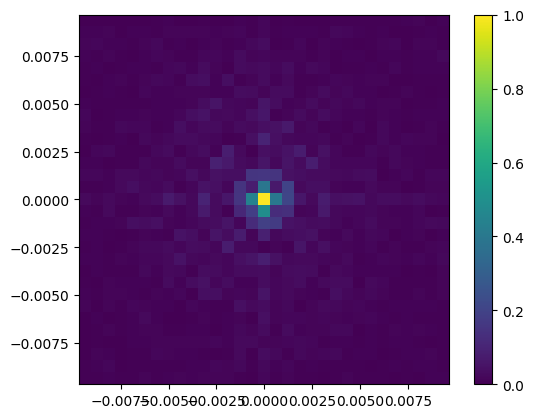

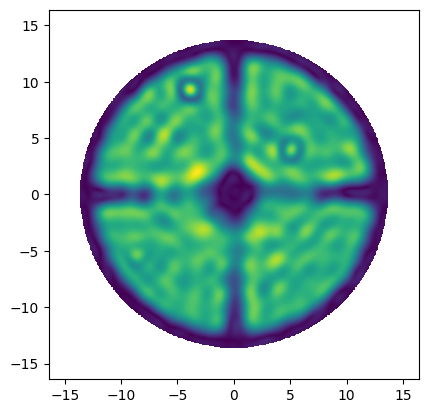

<xarray.Dataset>
Dimensions:          (time: 1, chan: 1, pol: 4, u_prime: 442, v_prime: 442,
                      u: 529, v: 529, l: 31, m: 31, ddi: 1)
Coordinates:
  * chan             (chan) float64 1.417e+10
  * ddi              (ddi) <U5 'ddi_0'
  * l                (l) float64 0.009664 0.009019 ... -0.009019 -0.009664
  * m                (m) float64 -0.009664 -0.009019 ... 0.009019 0.009664
  * pol              (pol) <U1 'I' 'Q' 'U' 'V'
  * u                (u) float64 774.6 771.7 768.8 ... -768.8 -771.7 -774.6
  * u_prime          (u_prime) float64 648.5 645.5 642.6 ... -642.6 -645.5
  * v                (v) float64 -774.6 -771.7 -768.8 ... 768.8 771.7 774.6
  * v_prime          (v_prime) float64 -648.5 -645.5 -642.6 ... 642.6 645.5
Dimensions without coordinates: time
Data variables:
    AMPLITUDE        (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    APERTURE         (time, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 133, 265), meta=np.ndarray>
    BEAM             (time, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 31, 31), meta=np.ndarray>
    CORRECTED_PHASE  (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
Attributes:
    ant_id:          ant_ea25
    ant_name:        ea25
    ddi:             ddi_0
    telescope_name:  EVLA
    time_centroid:   5170359444.5

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import scipy
import matplotlib.patches as patches

from scipy import constants

beforeimage = resultsfolder+'/before.split.image.zarr'
afterimage = resultsfolder+'/after.split.image.zarr'

plt.close('all')

chan = 0

ds = xr.open_zarr(afterimage+'/ant_ea25/ddi_0')
wavelength = scipy.constants.speed_of_light/ds.chan.values[chan]
l = ds.l.values
m = ds.m.values
u = ds.u.values*wavelength
v = ds.v.values*wavelength

print(u.min(),u.max())

plt.figure()
plt.imshow(np.abs(ds.BEAM[0,chan,0,:,:]),extent=[l.min(), l.max(), m.min(), m.max()])
plt.colorbar()
plt.show()

circle = patches.Circle((0,0), 12.5, fill=False, color='white', alpha=0.7, linewidth=2)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.APERTURE[0,chan,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])

plt.show()

ds

In [10]:
from astrohack.panel import panel

panel_model = 'rigid'

before_panel = panel(
    image_name=beforeimage, 
    panel_model=panel_model,
    parallel=True,
    overwrite=True
)
after_panel = panel(
    image_name=afterimage, 
    panel_model=panel_model,
    parallel=True,
    overwrite=True
)

2023-05-09 13:02:13,780 - INFO     - astrohack - (_check_parms.py:119) - Setting default panel_name to results/before.split.panel.zarr
2023-05-09 13:02:13,780 - INFO     - astrohack - (_check_parms.py:119) - Setting default sel_ddi to all
2023-05-09 13:02:13,781 - WARNING  - astrohack - (_io.py:41) - results/before.split.panel.zarr will be overwritten.
2023-05-09 13:02:13,781 - INFO     - astrohack - (panel.py:123) - Processing ddi_0 for ant_ea25
2023-05-09 13:02:13,782 - INFO     - astrohack - (panel.py:123) - Processing ddi_0 for ant_ea06
2023-05-09 13:02:14,835 - INFO     - astrohack - (panel.py:136) - Panel finished processing
2023-05-09 13:02:14,854 - INFO     - astrohack - (_check_parms.py:119) - Setting default panel_name to results/after.split.panel.zarr
2023-05-09 13:02:14,855 - INFO     - astrohack - (_check_parms.py:119) - Setting default sel_ddi to all
2023-05-09 13:02:14,855 - WARNING  - astrohack - (_io.py:41) - results/after.split.panel.zarr will be overwritten.
2023-05-

In [11]:
#beforescrews = resultsfolder+'/before-screws.txt'
#afterscrews = resultsfolder+'/after-screws.txt'

beforescrews = "results"+'/before-screws.txt'
afterscrews = "results"+'/after-screws.txt'
before_ant = before_panel.get_antenna('ant_ea25', 'ddi_0')
after_ant = after_panel.get_antenna('ant_ea25', 'ddi_0')

before_ant.export_screws(beforescrews, unit="mils")
after_ant.export_screws(afterscrews, unit="mils")

In [ ]:
#def relative_difference(mean, expected):  
#    return 100.*2*abs(mean - expected)/(abs(mean) + abs(expected))


#def extract_panel_data(fname, panel_list):
#    data = open(fname, 'r')
#    panels = []
#    for line in data:
#        wrds = line.split('  ')
#        if wrds[0] in panel_list:
#            nmbrs = line.split()
#            panel = [0, 0, 0, 0]
#            for i in range(4):
#                panel[-1-i] = float(nmbrs[-1-i])
#            panels.append(panel)
            
#    return np.array(panels)
    
#def compare_before_after(panel_list, expected_shift): 
#    # Replace with mds query
#    after = extract_panel_data(afterscrews, panel_list)
#    before = extract_panel_data(beforescrews, panel_list)
    
#    diffs = after - before
    
#    mean_shift = np.mean(diffs, axis=1)
    
#    percent_shift = relative_difference(mean_shift, expected_shift)
    
#    return mean_shift, percent_shift

#def test_improvement(pname, diff, unit):
#    abso = np.abs(diff)
#    if abso > 1e-7:
#        if diff < 0:
#            print('Panel {0:s} has improved by {1:.20f} {2:s}'.format(pname, abso, unit))
#        else:
#            print('Panel {0:s} is worse by {1:.20f} {2:s}'.format(pname, abso, unit))
#    else:
#        print('Panel {0:s} is unchanged'.format(pname))

#def is_it_an_improvement(mean_shift, percent_shift, ref_mean_shift):
#    sumcomp = np.mean(ref_mean_shift - mean_shift)
#    print(ref_mean_shift - mean_shift)
        
#    if abs(sumcomp) < 1e-7:
#        print('No changes!')
#    else:
#        print('Results have changed')
#        for i in range(4):
#            pname = panel_list[i]
#            if expected_shift[i] == 0:
#                diff = np.abs(mean_shift[i]-ref_mean_shift[i])
#                test_improvement(pname, diff, 'mils')
#            else:
#                diff = np.abs(percent_shift[i]) - np.abs(ref_percent_shift[i])
#                test_improvement(pname, diff, '%')


#panel_list = ['3-4', '5-27', '5-37', '5-38']
#expected_shift  = np.array([-100, 75, 0, 150])

#ref_mean_shift = np.array([-112.2325,   73.225,    -1.455,   139.04  ])
#ref_percent_shift = relative_difference(ref_mean_shift, expected_shift)
                
                
#mean_shift, percent_shift = compare_before_after(panel_list, expected_shift)
#is_it_an_improvement(mean_shift, percent_shift, ref_mean_shift)

In [ ]:
from astrohack.dio import open_panel

def verify_panel_shifts(
    panel_list=['3-4', '5-27', '5-37', '5-38'], 
    expected_shift=np.array([-100, 75, 0, 150]),
    ref_mean_shift = np.array([-112.2325, 73.225, -1.455, 139.04  ]),
    antenna='ant_ea25',
    ddi='ddi_0'
):
    
    M_TO_MILS = 39370.1
    
    before_mds = open_panel('results/before.split.panel.zarr')
    after_mds = open_panel('results/after.split.panel.zarr')
    
    before_shift = before_mds[antenna][ddi].sel(labels=panel_list).PANEL_SCREWS.values*M_TO_MILS
    after_shift = after_mds[antenna][ddi].sel(labels=panel_list).PANEL_SCREWS.values*M_TO_MILS
    
    difference = after_shift - before_shift
    
    mean_shift = np.mean(difference, axis=1)
    
    delta_mean_shift = np.abs(mean_shift - expected_shift)
    delta_ref_shift = np.abs(ref_mean_shift - expected_shift)
        
    delta_shift = delta_mean_shift - delta_ref_shift  # New corrections - old corrections --> delta if delta < 0 ==> we improved.
    
    if np.any(np.abs(delta_shift) > 0.0039): # This is approximately a micron shift
        print("There were changes!")
        print(delta_shift)
        for i, delta in enumerate(delta_shift):
            if delta < 0:
                print("{panel}, improved by {delta} mils".format(panel=panel_list[i], delta=delta))
            else:
                print("{panel}, got worse by {delta} mils".format(panel=panel_list[i], delta=delta))
    

In [ ]:
verify_panel_shifts()